# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [33]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.colors import ListedColormap
%matplotlib inline

In [34]:
plt.rcParams.update(
        {
            'figure.facecolor': 'white',
            'axes.facecolor': 'white',
            'font.size': 15,
            'figure.dpi': 72.0,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 8.0,
            'xtick.minor.size': 4.0,
            'ytick.major.size': 8.0,
            'ytick.minor.size': 4.0,
            'xtick.minor.visible': True,
            'ytick.minor.visible': True,
            'axes.grid': True,
            'axes.titlesize': 'larger',
            'axes.labelsize': 'larger',
            'grid.color': 'dimgray',
            'grid.linestyle': '-',
            'grid.alpha': 0.3,
            'axes.prop_cycle': cycler(
                color=[
                    '#0C5DA5',
                    '#FF9500',
                    '#00B945',
                    '#FF2C00',
                    '#845B97',
                    '#474747',
                    '#9E9E9E',
                ]
            ) * cycler(alpha=[1.0]),
            'scatter.marker': 'x',
            'lines.linewidth': 1.5,
        })

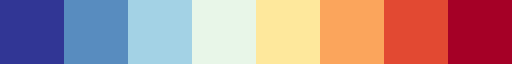

In [35]:
#define centered colorbar
emb = ListedColormap(mpl.colormaps['RdYlBu_r'](np.linspace(0, 1, 8)))
emb

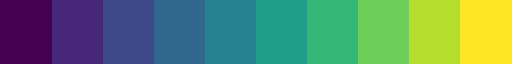

In [36]:
#define progressive colorbar
myvir = ListedColormap(mpl.colormaps['viridis'](np.linspace(0, 1, 10)))
myvir

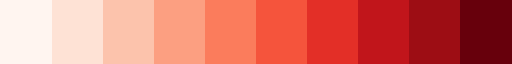

In [37]:
#define progressive colorbar
reds = ListedColormap(mpl.colormaps['Reds'](np.linspace(0, 1, 10)))
reds

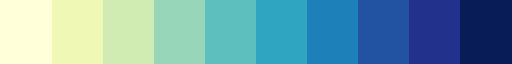

In [56]:
#define progressive colorbar
wet = ListedColormap(mpl.colormaps['YlGnBu'](np.linspace(0, 1, 10)))
wet

# Load files
File to evaluate the behaviour of native routing compared to standard.

First working on the same topographic grid (0.5°).

4 files are considered : one from the standard routing simulation, three from the native routing simulation (sechiba_history, diag_routing, diag_routing_r)

In [38]:
dir='/data/ptiengou/JZ_simu_outputs/routing_native'

In [39]:
#standard routing
filename = '{}/nat7.1/MO/combined_monthly.nc'.format(dir)
std = xr.open_mfdataset(filename)
std

<xarray.Dataset>
Dimensions:                 (time_counter: 156, bnds: 2, lon: 38, lat: 36,
                             solay: 11, veget: 15, nobio: 1)
Coordinates:
  * time_counter            (time_counter) datetime64[ns] 2000-01-31T12:00:00...
  * lon                     (lon) float32 -14.75 -14.25 -13.75 ... 3.25 3.75
  * lat                     (lat) float32 27.25 27.75 28.25 ... 44.25 44.75
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 1.0
Dimensions without coordinates: bnds
Data variables: (12/69)
    time_counter_bnds       (time_counter, bnds) datetime64[ns] dask.array<chunksize=(156, 2), meta=np.ndarray>
    Areas                   (lat, lon) float64 dask.array<chunksize=(36, 38), meta=np.ndarray>
    Contfrac                (lat, lon) float64 dask.array<chunksize=(36, 38), meta=np.ndarray>
    evap                    (time_counter, lat, lon) float64 dask.array<chunksize=(156, 36, 38), meta=np.ndarray>
    coastalflow             (time_counter, lat, lon) float64 dask.array<chunksize=(156, 36, 38), meta=np.ndarray>
    riverflow               (time_counter, lat, lon) float64 dask.array<chunksize=(156, 36, 38), meta=np.ndarray>
    ...                      ...
    humrel                  (time_counter, veget, lat, lon) float64 dask.array<chunksize=(156, 15, 36, 38), meta=np.ndarray>
    mrsos                   (time_counter, lat, lon) float64 dask.array<chunksize=(156, 36, 38), meta=np.ndarray>
    mrso                    (time_counter, lat, lon) float64 dask.array<chunksize=(156, 36, 38), meta=np.ndarray>
    LAImean                 (time_counter, lat, lon) float64 dask.array<chunksize=(156, 36, 38), meta=np.ndarray>
    snowtemp_weighted       (time_counter, lat, lon) float64 dask.array<chunksize=(156, 36, 38), meta=np.ndarray>
    frac_snow               (time_counter, lat, lon) float64 dask.array<chunksize=(156, 36, 38), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.3.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2024-Jan-26 16:07:13 GMT
    uuid:         a165ac95-4725-40e6-b8fb-7b8a30bd96f6
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...
    history:      Fri Feb  9 10:12:54 2024: ncrcat ./output_file_2000_monthly...
    CDO:          Climate Data Operators version 2.3.0 (https://mpimet.mpg.de...
    NCO:          netCDF Operators version 5.0.7 (Homepage = http://nco.sf.ne...

In [40]:
#open netcdf files for native routing diag_routing_r.nc (on MERIT grid)
filename='{}/nat12.1/*diag_routing_r.nc'.format(dir)
tcst1=xr.open_mfdataset(filename)
filename='{}/nat12/exact_std_csts/*diag_routing_r.nc'.format(dir)
tcst2=xr.open_mfdataset(filename)
filename='{}/nat12.2/correct_tcst/*diag_routing_r.nc'.format(dir)
tcst3=xr.open_mfdataset(filename)

filename='{}/tcst7_long/tcst7_hydrographs_1980-2010.nc'.format(dir)
tcst4=xr.open_mfdataset(filename)
filename='{}/tcst7GSWP3/*diag_routing_r.nc'.format(dir)
tcst4_g=xr.open_mfdataset(filename)
# filename='{}/tcst7irr_long/*_hydrographs_1980-2010.nc'.format(dir)
filename='{}/tcst7irr/*diag_routing_r.nc'.format(dir)
tcst4_irr=xr.open_mfdataset(filename)
filename='{}/tcst7irr0.6_long/*_hydrographs_1980-2010.nc'.format(dir)
tcst4_irr6=xr.open_mfdataset(filename)

filename='{}/tcst2rsoil/*diag_routing_r.nc'.format(dir)
tcst2_rsoil=xr.open_mfdataset(filename)

In [41]:
#open files on ORC grid
filename='{}/nat12.1/*sechiba_history.nc'.format(dir)
tcst1ORC=xr.open_mfdataset(filename)
filename='{}/nat12/exact_std_csts/*sechiba_history.nc'.format(dir)
tcst2ORC=xr.open_mfdataset(filename)
filename='{}/nat12.2/correct_tcst/*sechiba_history.nc'.format(dir)
tcst3ORC=xr.open_mfdataset(filename)
filename='{}/tcst7/*sechiba_history.nc'.format(dir)
tcst4ORC=xr.open_mfdataset(filename)


In [72]:
filename='{}/tcst7irr/*sechiba_history.nc'.format(dir)
tcst4_irrORC=xr.open_mfdataset(filename)
tcst4_irrORC = tcst4_irrORC.rename({'time_counter' : 'time'})
tcst4_irrORC.attrs['name'] = 'tcst4'

# File manipulations

In [42]:
#tcst1
#rename time_counter to time
tcst1 = tcst1.rename({'time_counter' : 'time'})
tcst1ORC = tcst1ORC.rename({'time_counter' : 'time'})
#Change dataset names attribute for automatic labeling
tcst1.attrs['name'] = 'tcst1'
tcst1ORC.attrs['name'] = 'tcst1'
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {
        'routing_hydrographs_r' : 'hydrographs'
        }
#change the variables that exist according to the dictionary
tcst1 = tcst1.rename(dict)
tcst1

<xarray.Dataset>
Dimensions:                     (lat: 1200, lon: 1260, basins: 200, time: 156,
                                 axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.99 45.97 45.96 ... 26.02 26.01
  * lon                         (lon) float32 -15.99 -15.98 ... 4.975 4.992
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 2000-01-16T12:00:00 ......
    time_centered               (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_centered_bounds        (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_lakeinflow_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    ...                          ...
    hydrographs                 (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(12, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_stream_diag_r       (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
Attributes:
    name:         tcst1
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-19 11:48:55 GMT
    uuid:         1ccd4c6c-2f15-4bff-9dd8-52a15fb2998f

In [43]:
#tcst2
#rename time_counter to time
tcst2 = tcst2.rename({'time_counter' : 'time'})
tcst2ORC = tcst2ORC.rename({'time_counter' : 'time'})
#Change dataset names attribute for automatic labeling
tcst2.attrs['name'] = 'tcst2'
tcst2ORC.attrs['name'] = 'tcst2'
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {
        'routing_hydrographs_r' : 'hydrographs'
        }
#change the variables that exist according to the dictionary
tcst2 = tcst2.rename(dict)
tcst2

<xarray.Dataset>
Dimensions:                     (lat: 1200, lon: 1260, basins: 200, time: 156,
                                 axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.99 45.97 45.96 ... 26.02 26.01
  * lon                         (lon) float32 -15.99 -15.98 ... 4.975 4.992
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 2000-01-16T12:00:00 ......
    time_centered               (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_centered_bounds        (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_lakeinflow_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    ...                          ...
    hydrographs                 (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(12, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_stream_diag_r       (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
Attributes:
    name:         tcst2
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-20 09:17:31 GMT
    uuid:         a7784920-1901-4574-aadc-0147b96a2a2e

In [44]:
#tcst2rsoil
#rename time_counter to time
tcst2_rsoil = tcst2_rsoil.rename({'time_counter' : 'time'})
#Change dataset names attribute for automatic labeling
tcst2_rsoil.attrs['name'] = 'tcst2_rsoil'
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {
        'routing_hydrographs_r' : 'hydrographs'
        }
#change the variables that exist according to the dictionary
tcst2_rsoil = tcst2_rsoil.rename(dict)
tcst2_rsoil

<xarray.Dataset>
Dimensions:                     (lat: 1200, lon: 1260, basins: 200, time: 156,
                                 axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.99 45.97 45.96 ... 26.02 26.01
  * lon                         (lon) float32 -15.99 -15.98 ... 4.975 4.992
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 2000-01-16T12:00:00 ......
    time_centered               (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_centered_bounds        (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_lakeinflow_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    ...                          ...
    hydrographs                 (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(12, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_stream_diag_r       (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
Attributes:
    name:         tcst2_rsoil
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Mar-14 13:08:06 GMT
    uuid:         fb8a96fc-e3a5-4f90-a8c7-229cb33a9355

In [45]:
#tcst3
#rename time_counter to time
tcst3 = tcst3.rename({'time_counter' : 'time'})
tcst3ORC = tcst3ORC.rename({'time_counter' : 'time'})
#Change dataset names attribute for automatic labeling
tcst3.attrs['name'] = 'tcst3'
tcst3ORC.attrs['name'] = 'tcst3'
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {
        'routing_hydrographs_r' : 'hydrographs'
        }
#change the variables that exist according to the dictionary
tcst3 = tcst3.rename(dict)
tcst3

<xarray.Dataset>
Dimensions:                     (lat: 1200, lon: 1260, basins: 200, time: 156,
                                 axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.99 45.97 45.96 ... 26.02 26.01
  * lon                         (lon) float32 -15.99 -15.98 ... 4.975 4.992
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 2000-01-16T12:00:00 ......
    time_centered               (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_centered_bounds        (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_lakeinflow_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    ...                          ...
    hydrographs                 (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(12, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_stream_diag_r       (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
Attributes:
    name:         tcst3
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-19 17:53:02 GMT
    uuid:         9b04cbfd-498f-4584-a31c-09cae1967d7a

In [46]:
#tcst4 (old tcst7)
#rename time_counter to time
tcst4 = tcst4.rename({'time_counter' : 'time'})
tcst4ORC = tcst4ORC.rename({'time_counter' : 'time'})
#Change dataset names attribute for automatic labeling
tcst4.attrs['name'] = 'tcst4'
tcst4ORC.attrs['name'] = 'tcst4'
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {
        'routing_hydrographs_r' : 'hydrographs'
        }
#change the variables that exist according to the dictionary
tcst4 = tcst4.rename(dict)
tcst4

<xarray.Dataset>
Dimensions:              (lat: 1200, lon: 1260, time: 372, axis_nbounds: 2)
Coordinates:
  * lat                  (lat) float32 45.99 45.97 45.96 ... 26.04 26.02 26.01
  * lon                  (lon) float32 -15.99 -15.98 -15.96 ... 4.975 4.992
  * time                 (time) datetime64[ns] 1980-01-16T12:00:00 ... 2010-1...
    time_instant         (time) datetime64[ns] dask.array<chunksize=(372,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables:
    hydrographs          (time, lat, lon) float64 dask.array<chunksize=(372, 1200, 1260), meta=np.ndarray>
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(372, 2), meta=np.ndarray>
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(372, 2), meta=np.ndarray>
Attributes:
    name:         tcst4
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Mar-26 14:41:21 GMT
    uuid:         3432a5e3-bc89-410e-83e8-84b29b31faa9
    history:      Wed Apr 10 20:04:01 2024: ncrcat -O tcst7_hydrographs_1980-...
    NCO:          netCDF Operators version 5.0.7 (Homepage = http://nco.sf.ne...

In [47]:
#tcst4_gswp3 (old tcst7)
#rename time_counter to time
tcst4_g = tcst4_g.rename({'time_counter' : 'time'})
# tcst4ORC = tcst4ORC.rename({'time_counter' : 'time'})
#Change dataset names attribute for automatic labeling
tcst4_g.attrs['name'] = 'tcst4_gswp3'
# tcst4ORC.attrs['name'] = 'tcst1'
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {
        'routing_hydrographs_r' : 'hydrographs'
        }
#change the variables that exist according to the dictionary
tcst4_g = tcst4_g.rename(dict)
tcst4_g

<xarray.Dataset>
Dimensions:                     (lat: 1200, lon: 1260, basins: 200, time: 132,
                                 axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.99 45.97 45.96 ... 26.02 26.01
  * lon                         (lon) float32 -15.99 -15.98 ... 4.975 4.992
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 2000-01-16T12:00:00 ......
    time_centered               (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_centered_bounds        (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_lakeinflow_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    ...                          ...
    hydrographs                 (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(12, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_stream_diag_r       (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
Attributes:
    name:         tcst4_gswp3
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Mar-05 16:43:22 GMT
    uuid:         06fa795a-d094-4890-ba15-5e1c34582089

In [48]:
#tcst4irr (old tcst7)
#rename time_counter to time
tcst4_irr = tcst4_irr.rename({'time_counter' : 'time'})
#Change dataset names attribute for automatic labeling
tcst4_irr.attrs['name'] = 'tcst4_irr_default'
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {
        'routing_hydrographs_r' : 'hydrographs'
        }
#change the variables that exist according to the dictionary
tcst4_irr = tcst4_irr.rename(dict)
tcst4_irr

<xarray.Dataset>
Dimensions:                     (lat: 1200, lon: 1260, basins: 200, time: 156,
                                 axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 45.99 45.97 45.96 ... 26.02 26.01
  * lon                         (lon) float32 -15.99 -15.98 ... 4.975 4.992
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 2000-01-16T12:00:00 ......
    time_centered               (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_centered_bounds        (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_lakeinflow_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    ...                          ...
    hydrographs                 (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(12, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
    routing_stream_diag_r       (time, lat, lon) float64 dask.array<chunksize=(12, 1200, 1260), meta=np.ndarray>
Attributes:
    name:         tcst4_irr_default
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-29 08:37:37 GMT
    uuid:         a02890d7-e1c4-4f12-a8e4-7eeadaf8cbcd

In [49]:
#tcst4irr_reduced (old tcst7)
#rename time_counter to time
tcst4_irr6 = tcst4_irr6.rename({'time_counter' : 'time'})
# tcst4ORC = tcst4ORC.rename({'time_counter' : 'time'})
#Change dataset names attribute for automatic labeling
tcst4_irr6.attrs['name'] = 'tcst4_irr_reduced'
# tcst4ORC.attrs['name'] = 'tcst1'
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {
        'routing_hydrographs_r' : 'hydrographs'
        }
#change the variables that exist according to the dictionary
tcst4_irr6 = tcst4_irr6.rename(dict)
tcst4_irr6

<xarray.Dataset>
Dimensions:              (lat: 1140, lon: 1380, time: 372, axis_nbounds: 2)
Coordinates:
  * lat                  (lat) float32 49.99 49.97 49.96 ... 31.04 31.02 31.01
  * lon                  (lon) float32 -14.99 -14.98 -14.96 ... 7.975 7.992
  * time                 (time) datetime64[ns] 1980-01-16T12:00:00 ... 2010-1...
    time_instant         (time) datetime64[ns] dask.array<chunksize=(372,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables:
    hydrographs          (time, lat, lon) float64 dask.array<chunksize=(372, 1140, 1380), meta=np.ndarray>
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(372, 2), meta=np.ndarray>
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(372, 2), meta=np.ndarray>
Attributes:
    name:         tcst4_irr_reduced
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Apr-10 17:24:28 GMT
    uuid:         4e38b9bd-af9e-483f-ad3b-cff5a6ea1115
    history:      Thu Apr 11 19:13:55 2024: ncrcat -O tcst7irr0.6_hydrographs...
    NCO:          netCDF Operators version 5.0.7 (Homepage = http://nco.sf.ne...

In [50]:
std = std.rename({'time_counter' : 'time'})
std.attrs['name']='Standard routing (subgrid_halfdeg)'

In [51]:
# #Rename variables in natDIAG_R_month and natDIAG_R
# dict = {
#         # 'routing_stream_reservoir_r' : 'streamr',
#         # 'routing_fast_reservoir_r' : 'fastr',
#         # 'routing_slow_reservoir_r' : 'slowr',
#         # 'routing_drainage_r' : 'drainage',
#         # 'routing_runoff_r' : 'runoff',
#         'routing_hydrographs_r' : 'hydrographs',
#         # 'routing_irrigation_r' : 'irrigation',
#         # 'irrig_netereq_r' : 'netirrig'
#         # 'routing_riverflow_r' : 'riverflow',
#         # 'routing_coastalflow_r' : 'coastalflow'
#         }
# #change the variables that exist according to the dictionary
# natDIAG_R = natDIAG_R.rename(dict)
# natDIAG_Rirr = natDIAG_Rirr.rename(dict)

# natDIAG_RGSWP3 = natDIAG_RGSWP3.rename(dict)
# natDIAG_RGSWP3irr = natDIAG_RGSWP3irr.rename(dict)
# natDIAG_Rirr06 = natDIAG_Rirr06.rename(dict)

In [ ]:
# time = pd.to_datetime(natDIAG_R['time'].values)
# shifted_time = time - pd.Timedelta(days=1)
# natDIAG_R['time'] = shifted_time

# time = pd.to_datetime(natDIAG_Rirr['time'].values)
# shifted_time = time - pd.Timedelta(days=1)
# natDIAG_Rirr['time'] = shifted_time

# Stations

In [ ]:
filename='../../../routing/GRDC_Monthly_Jan20_v1_ES.nc'
stations = xr.open_dataset(filename)
stations

In [ ]:
# create a dict with id name, lon lat for a subset of stations
stations_merit = {
    6298249: {'name': 'Zaragoza',  'river': 'Ebro', 'lon_grid':-0.8749926686286926, 'lat_grid':41.65833282470703, 'year_min':2003, 'year_max':2012},
    6298992: {'name': 'Albarreal De Tajo',  'river': 'Tajo', 'lon_grid':-4.17499303817749, 'lat_grid':39.891666412353516, 'year_min':2003, 'year_max':2012 },
    6298481: {'name': 'San Miguel del Pino', 'river': 'Duero', 'lon_grid':-4.92499303817749, 'lat_grid':41.508331298828125, 'year_min':2003, 'year_max':2012},
    6298259:{'name': 'Badajoz', 'river': 'Guadiana', 'lat_grid': 38.85833358764648, 'lon_grid': -7.008326530456543, 'last_record': '2013-09-15', 'year_min':2003, 'year_max':2012},
    # 6298564: {'name': 'Villanueva de Azoague', 'lon_grid':-5.641659736633301, 'lat_grid':41.974998474121094, 'year_min':1982, 'year_max':2012},
    # 6299121:{'name': 'Orellana La Vieja', 'river': ' Guadiana', 'lat_grid': 38.99166488647461, 'lon_grid': -5.541659832000732, 'last_record': '2013-09-15'}
}

# # create a dict with id name, lon lat for a subset of stations
# stations_merit = {
#     6298249: {'name': 'Zaragoza',  'river': 'Ebro', 'lon_grid':-0.8749926686286926, 'lat_grid':41.65833282470703, 'year_min':1980, 'year_max':2010},
#     6298992: {'name': 'Albarreal De Tajo',  'river': 'Tajo', 'lon_grid':-4.17499303817749, 'lat_grid':39.891666412353516, 'year_min':1980, 'year_max':2010 },
#     6298481: {'name': 'San Miguel del Pino', 'river': 'Duero', 'lon_grid':-4.92499303817749, 'lat_grid':41.508331298828125, 'year_min':1980, 'year_max':2010},
#     6298259:{'name': 'Badajoz', 'river': 'Guadiana', 'lat_grid': 38.85833358764648, 'lon_grid': -7.008326530456543, 'last_record': '2013-09-15', 'year_min':1996, 'year_max':2010},
#     # 6298564: {'name': 'Villanueva de Azoague', 'lon_grid':-5.641659736633301, 'lat_grid':41.974998474121094, 'year_min':1982, 'year_max':2012},
#     # 6299121:{'name': 'Orellana La Vieja', 'river': ' Guadiana', 'lat_grid': 38.99166488647461, 'lon_grid': -5.541659832000732, 'last_record': '2013-09-15'}
# }

In [ ]:
# keep copy of dict
# stations_merit = {
#     6298249: {'name': 'Zaragoza',  'river': 'Ebro', 'lon_grid':-0.8749926686286926, 'lat_grid':41.65833282470703, 'year_min':1982, 'year_max':2012},
#     6298992: {'name': 'Albarreal De Tajo',  'river': 'Tajo', 'lon_grid':-4.17499303817749, 'lat_grid':39.891666412353516, 'year_min':1982, 'year_max':2012 },
#     6298481: {'name': 'San Miguel del Pino', 'river': 'Duero', 'lon_grid':-4.92499303817749, 'lat_grid':41.508331298828125, 'year_min':1982, 'year_max':2012},
#     6298259:{'name': 'Badajoz', 'river': 'Guadiana', 'lat_grid': 38.85833358764648, 'lon_grid': -7.008326530456543, 'last_record': '2013-09-15', 'year_min':1996, 'year_max':2012},
    # 6298564: {'name': 'Villanueva de Azoague', 'lon_grid':-5.641659736633301, 'lat_grid':41.974998474121094, 'year_min':1982, 'year_max':2012},
    # 6299121:{'name': 'Orellana La Vieja', 'river': ' Guadiana', 'lat_grid': 38.99166488647461, 'lon_grid': -5.541659832000732, 'last_record': '2013-09-15'},
    # 6298071:{'name': 'Constantina', 'river': ' Guadalquivir', 'lat_grid': 37.77499771118164, 'lon_grid': -5.691659450531006, 'last_record': '2013-09-15', 'year_min':1994, 'year_max':2009},
    # 6299029:{'name': 'Santiago-Pontones', 'river': ' Guadalquivir', 'lat_grid': 38.17499923706055, 'lon_grid': -2.791659355163574, 'last_record': '2013-09-15'},
    # # 6298149:{'name': 'Lucena', 'river': ' Guadalquivir', 'lat_grid': 37.29166412353516, 'lon_grid': -4.67499303817749, 'last_record': '2009-04-15'},
    # # 6298597:{'name': 'Guejar Sierra', 'river': ' Guadalquivir', 'lat_grid': 37.15833282470703, 'lon_grid': -3.474992752075196, 'last_record': '2012-09-15'},
    # 6298606:{'name': 'Pozo Alcon', 'river': ' Guadalquivir', 'lat_grid': 37.758331298828125, 'lon_grid': -2.9083261489868164, 'last_record': '2013-09-15'},
    # # 6298731:{'name': 'Valdepenas De Jaen', 'river': ' Guadalquivir', 'lat_grid': 37.625, 'lon_grid': -3.7249927520751953, 'last_record': '2013-09-15'},
    # 6299108:{'name': 'Hornachuelos', 'river': ' Guadalquivir', 'lat_grid': 37.90833282470703, 'lon_grid': -5.20832633972168, 'last_record': '2013-09-15'},
    # 6299220:{'name': 'Villacarrillo', 'river': ' Guadalquivir', 'lat_grid': 38.04166412353516, 'lon_grid': -2.9583261013031006, 'last_record': '2013-09-15'},
# }

In [ ]:
# plot station location on a map with rivers and coastlines
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-10, 4, 35, 45])
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.ylocator = gl.ylocator = plt.MaxNLocator(5)
gl.right_labels = False
gl.top_labels = False
for key, coordinates in stations_merit.items():
    plt.scatter(coordinates['lon_grid'], coordinates['lat_grid'], s=30, label=coordinates['name'], marker='o')
plt.title('Location of selected stations')
#activate legend and put it in the bottom right corner
plt.legend(loc='lower right')

In [ ]:
# visualize time series for selected stations
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax = ax.flatten()
for i, (key, coordinates) in enumerate(stations_merit.items()):
    mask = (stations['number'] == key)
    station = stations.sel(stations=mask)
    #remove years before 2003 and after 2012
    station = station.where((station['time.year'] >= coordinates['year_min']), drop=True)
    station = station.where((station['time.year'] <= coordinates['year_max']), drop=True)
    ax[i].plot(station['time'],station['mergedhydro'], label='obs', c='black')
    ax[i].set_title(coordinates['name'])
    ax[i].set_ylabel('discharge [m3/s]')
    ax[i].legend()

In [ ]:
# visualize seasonnal cycle for selected stations
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
for i, (key, coordinates) in enumerate(stations_merit.items()):
    mask = (stations['number'] == key)
    station = stations.sel(stations=mask)
    ax = ax.flatten()
    #remove years before 2003 and after 2012
    station = station.where((station['time.year'] >= coordinates['year_min']), drop=True)
    station = station.where((station['time.year'] <= coordinates['year_max']), drop=True)
    station = station.groupby('time.month').mean()
    ax[i].set_title(coordinates['name'])
    ax[i].plot(station['month'],station['mergedhydro'], label='obs', c='black')
    ax[i].set_ylabel('discharge [m3/s]')
    #set Y minimum to 0
    ax[i].set_ylim(bottom=0)
    #add months name to x-axis ticks
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax[i].set_xticks(np.arange(1,13))
    ax[i].set_xticklabels(months)
    ax[i].legend()
plt.tight_layout()

# Seasonnal cycles

In [ ]:
# seasonnal cycle for one station
station_id=6298249
station_id=6298481
mask = (stations['number'] == station_id)
station = stations.sel(stations=mask)
ds1 = tcst1
ds2 = tcst2
ds3 = tcst3
ds4 = std
# ds3=natDIAG_Rirr06
lon = stations_merit[station_id]['lon_grid']
lat = stations_merit[station_id]['lat_grid']
name = stations_merit[station_id]['name']
year_min = stations_merit[station_id]['year_min']
year_max = stations_merit[station_id]['year_max']
# year_min = 2003
# year_max = 2012
min_date='{}-01-01'.format(year_min)
max_date='{}-12-31'.format(year_max)
river=stations_merit[station_id]['river']

plt.figure(figsize=(10, 5))

var1=ds1['hydrographs'].sel(time=slice(min_date, max_date))
var2=ds2['hydrographs'].sel(time=slice(min_date, max_date))
var3=ds3['hydrographs'].sel(time=slice(min_date, max_date))
var4=ds4['hydrographs'].sel(time=slice(min_date, max_date))
var1.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(label=ds1.attrs['name'])
var2.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(label=ds2.attrs['name'])
var3.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(label=ds3.attrs['name'])
var4.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(label=ds4.attrs['name'],c='grey')

station = station.where((station['time.year'] >= year_min), drop=True)
station = station.where((station['time.year'] <= year_max), drop=True)
station = station.groupby('time.month').mean()
plt.plot(station['month'],station['mergedhydro'], label='obs', c='black')

plt.ylim(bottom=0)
# plt.ylim(top=400)
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(1,13), labels=months)
# plt.ticks(labels=months)
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='upper right')
plt.title('Mean seasonnal cycle for station {}, on {} ({}-{})'.format(name, river, year_min, year_max))

In [ ]:
#cycle saisonnier pour x points de grille
ds1 = tcst1
ds2 = tcst2
ds3 = tcst3
ds4 = tcst4

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (sta_id, coordinates) in enumerate(stations_merit.items()):
    lon = coordinates['lon_grid']
    lat = coordinates['lat_grid']
    name = coordinates['name']
    # year_min = coordinates['year_min']
    # year_max = coordinates['year_max']
    year_min=2003
    year_max=2012
    river=coordinates['river']
    min_date='{}-01-01'.format(year_min)
    max_date='{}-12-31'.format(year_max)
    
    ax = axes[i]

    #Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    var1=ds1['hydrographs'].sel(time=slice(min_date, max_date))
    var2=ds2['hydrographs'].sel(time=slice(min_date, max_date))
    var3=ds3['hydrographs'].sel(time=slice(min_date, max_date))
    var4=ds4['hydrographs'].sel(time=slice(min_date, max_date))
    var1.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.attrs['name'])
    var2.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.attrs['name'])
    var3.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds3.attrs['name'])
    var4.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds4.attrs['name'])
    
    # Compute the annual cycle of hydrographs at the point (lon, lat) for observation
    mask = (stations['number'] == sta_id)
    station = stations.sel(stations=mask)
    station = station.where((station['time.year'] >= year_min), drop=True)
    station = station.where((station['time.year'] <= year_max), drop=True)
    station=station.groupby('time.month').mean()
    ax.plot(station['month'],station['mergedhydro'], label='obs', c='black')
    
    #add months name to x-axis ticks
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax.set_xticks(np.arange(1,13))
    ax.set_xticklabels(months)
    ax.set_ylabel('')
    ax.set_xlabel('')
    if (i==0):
        ax.legend(loc='lower left')
    ax.set_title('Station {}, on {} ({}-{})'.format(name, river, year_min, year_max))

# Remove any remaining empty subplots
for i in range(len(stations_merit), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Seasonal cycle of river discharge (m³/s)")
plt.tight_layout()

# Time series

In [ ]:
#Série temporelle pour x points de grille
ds1 = tcst4
ds2 = tcst4_irr
ds3 = tcst4_irr6
ds4 = std

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (sta_id, coordinates) in enumerate(stations_merit.items()):
    lon = coordinates['lon_grid']
    lat = coordinates['lat_grid']
    name = coordinates['name']
    year_min = coordinates['year_min']
    year_max = coordinates['year_max']
    # year_min=2010
    # year_max=2013
    river=coordinates['river']
    min_date='{}-01-01'.format(year_min)
    max_date='{}-12-31'.format(year_max)
    
    ax = axes[i]

    #Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    var1=ds1['hydrographs'].sel(time=slice(min_date, max_date))
    var2=ds2['hydrographs'].sel(time=slice(min_date, max_date))
    var3=ds3['hydrographs'].sel(time=slice(min_date, max_date))
    var4=ds4['hydrographs'].sel(time=slice(min_date, max_date))
    var1.sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.attrs['name'])
    var2.sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.attrs['name'])
    var3.sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds3.attrs['name'])
    # var4.sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds4.attrs['name'],c='grey')
    
    # Compute the annual cycle of hydrographs at the point (lon, lat) for observation
    mask = (stations['number'] == sta_id)
    station = stations.sel(stations=mask)
    station = station.where((station['time.year'] >= year_min), drop=True)
    station = station.where((station['time.year'] <= year_max), drop=True)
    ax.plot(station['time'],station['mergedhydro'], label='obs', c='black')
    
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend()
    ax.set_title('Station {}, on {} ({}-{})'.format(name, river, year_min, year_max))

plt.suptitle("River discharge (m³/s)")
plt.tight_layout()

In [ ]:
#Average time series
var='streamr'
ds1=tcst1ORC
ds2=tcst2ORC
ds3=tcst3ORC
ds4=tcst4ORC
ds5=std
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1[var].mean(dim=['lon','lat']).plot(ax=ax, label=ds1.name)
ds2[var].mean(dim=['lon','lat']).plot(ax=ax, label=ds2.name)
ds3[var].mean(dim=['lon','lat']).plot(ax=ax, label=ds3.name)
ds4[var].mean(dim=['lon','lat']).plot(ax=ax, label=ds4.name)
ds5[var].mean(dim=['lon','lat']).plot(ax=ax, label=ds5.name, c='grey')
plt.title(ds1[var].long_name + '({})'.format(ds1[var].units))
plt.legend()

In [ ]:
#Time series
year_min=2003
year_max=2012
# # Guadalquivir
lon=-6.34
lat=36.79

var="hydrographs"
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
ds2=natDIAG_R
ds2 = ds2.where(ds2['time.year'] >= year_min, drop=True).where(ds2['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ax.set_ylabel('hydrographs')
# ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)
ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)
# ds2['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff')
plt.title('hydrographs at (' + str(lon) + ',' + str(lat) + '), m³/s')
plt.legend()

In [ ]:
#Time series
year_min=2003
year_max=2012
lon=-8.875
lat=41.86
ds1=natDIAG_R
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff',c='green')
ds1['drainage'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='drainage',c='brown')
# ['rain'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='rainfall',c='blue')
plt.title('Runoff and drainage at (' + str(lon) + ',' + str(lat) + '), mm/d')
plt.legend()